[*********************100%***********************]  1 of 1 completed


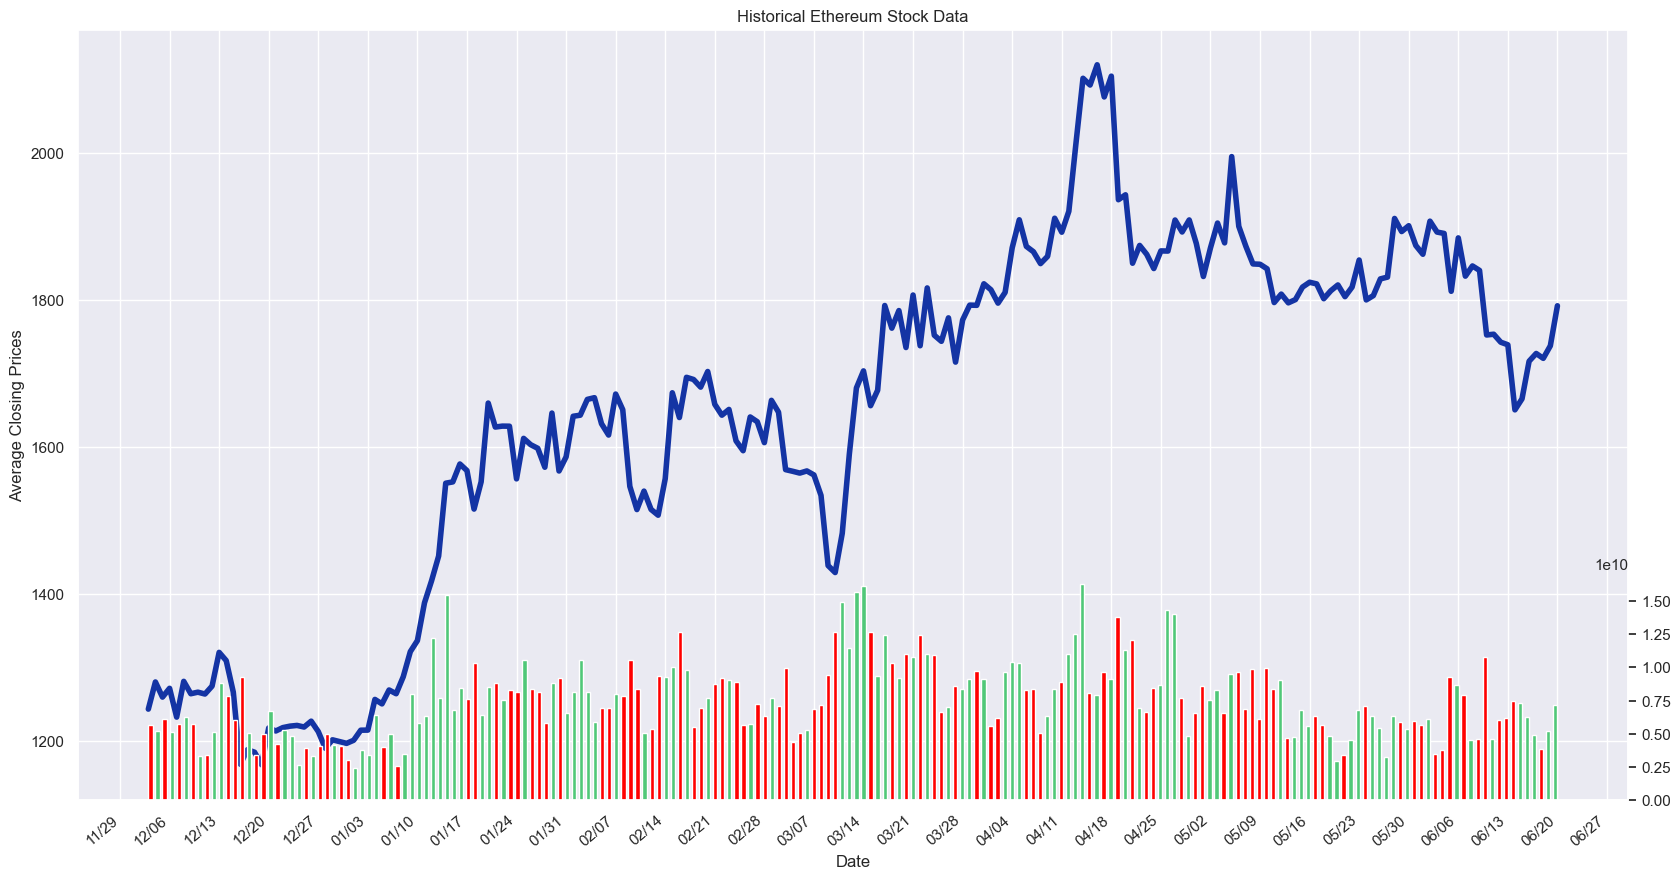

In [17]:
import pandas as pd
import numpy as np
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date, timedelta
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
import matplotlib.gridspec as gridspec

eth_fig = plt.figure(figsize = (20, 10))
ax = plt.subplot()
today = date.today()
past_time = today - timedelta(days = 200)
eth_data = yf.download("ETH-USD", past_time,today)
eth_plot = sns.lineplot(data = eth_data, x = "Date", y = "Close", color = "#1434A4", linewidth = 4)
eth_plot.set_title("Historical Ethereum Stock Data")
eth_plot.set_ylabel("Average Closing Prices")
sns.set_theme(style = "darkgrid")

date_form = DateFormatter("%m/%d")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
plt.xticks(rotation = 40, ha = "right")

eth_stock_up = eth_data[eth_data.Close >= eth_data.Open]
eth_stock_down = eth_data[eth_data.Close <= eth_data.Open]
decrease_color = "red"
increase_color = "#50C878"

ax2 = eth_fig.add_subplot(3, 2, (5, 6))
ax2.xaxis.set_tick_params(labelbottom=False)
ax2.set_facecolor("none")
plt.grid(False)
ax2.bar(eth_stock_up.index, eth_stock_up.Volume, 0.6, color = increase_color)
ax2.bar(eth_stock_down.index, eth_stock_down.Volume, 0.6, color = decrease_color)
ax2.yaxis.set_label_position("right")
ax2.yaxis.tick_right()
plt.gca().spines["top"].set_visible(False)

plt.show()

[*********************100%***********************]  1 of 1 completed


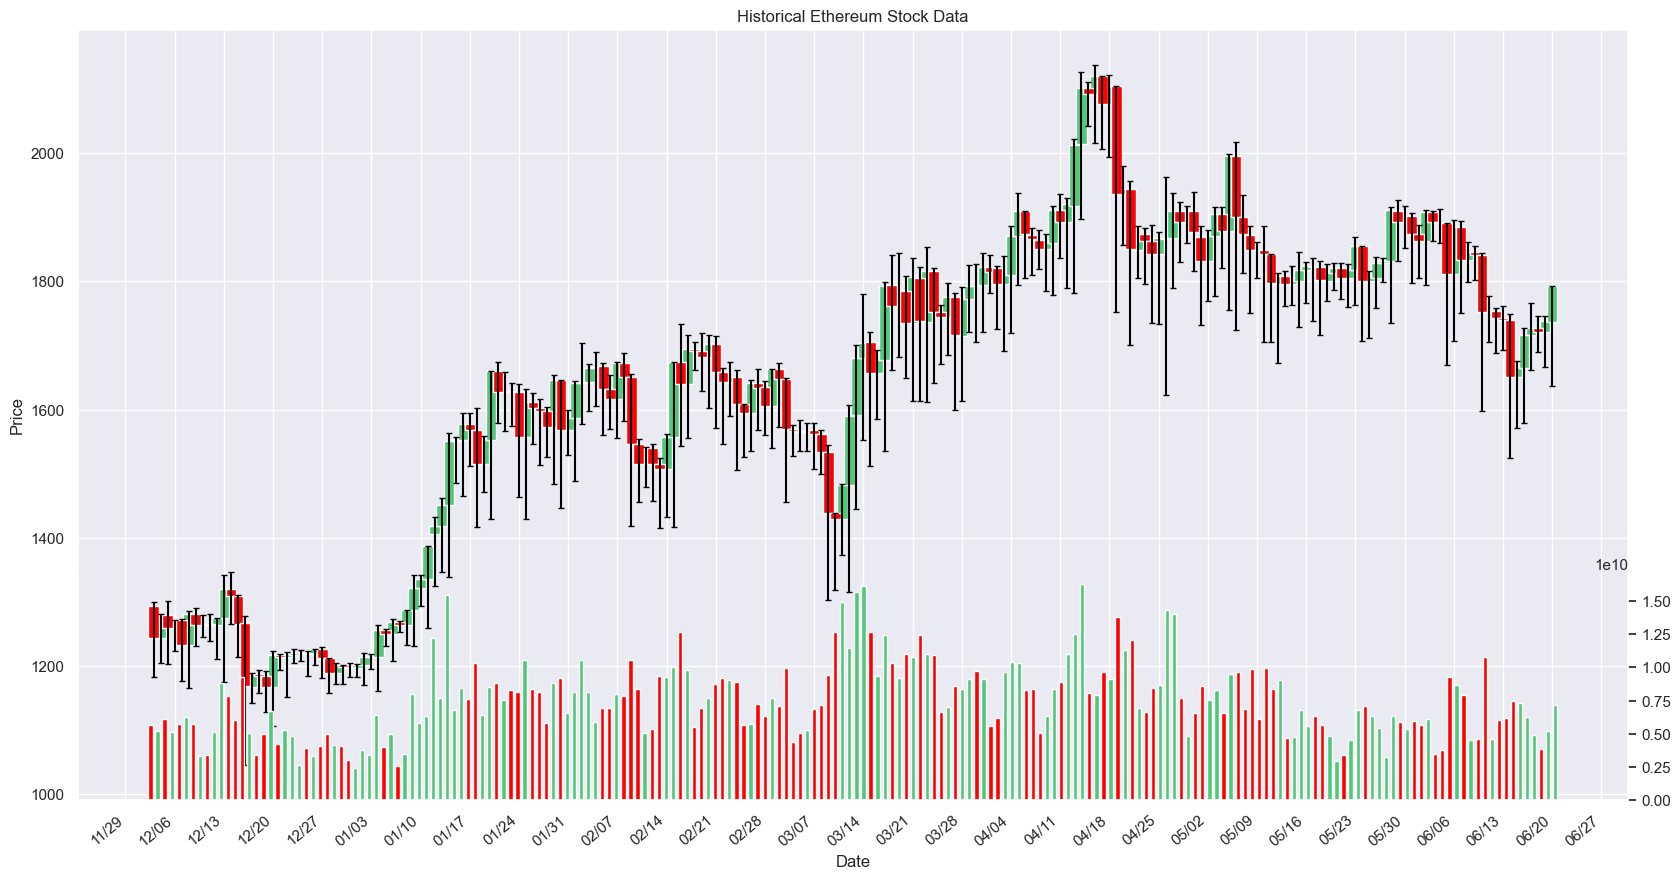

In [22]:
import pandas as pd
import numpy as np
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date, timedelta
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

eth_fig = plt.figure(figsize = (20, 10))
ax = plt.subplot()
today = date.today()
past_time = today - timedelta(days = 200)
eth_data = yf.download("ETH-USD", past_time,today, interval = "1d")

eth_stock_up = eth_data[eth_data.Close >= eth_data.Open]
eth_stock_down = eth_data[eth_data.Close <= eth_data.Open]
decrease_color = "red"
increase_color = "#50C878"

plt.bar(eth_stock_up.index, eth_stock_up.Close - eth_stock_up.Open, 1.5, eth_stock_up.Open, color = increase_color)
plt.errorbar(eth_stock_up.index, eth_stock_up.Low, yerr = eth_stock_up.High - eth_stock_up.Low, fmt = "none", color = "black", capsize = 2)
plt.bar(eth_stock_down.index, eth_stock_down.Open - eth_stock_down.Close, 1.5, eth_stock_down.Close, color = decrease_color)
plt.errorbar(eth_stock_down.index, eth_stock_down.Low, yerr = eth_stock_down.High - eth_stock_down.Low, fmt = "none", color = "black", capsize = 2)

date_form = DateFormatter("%m/%d")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
plt.xticks(rotation = 40, ha = "right")

plt.title("Historical Ethereum Stock Data")
plt.xlabel("Date")
plt.ylabel("Price")

ax2 = eth_fig.add_subplot(3, 2, (5, 6))
ax2.xaxis.set_tick_params(labelbottom=False)
ax2.set_facecolor("none")
plt.grid(False)
ax2.bar(eth_stock_up.index, eth_stock_up.Volume, 0.6, color = increase_color)
ax2.bar(eth_stock_down.index, eth_stock_down.Volume, 0.6, color = decrease_color)
ax2.yaxis.set_label_position("right")
ax2.yaxis.tick_right()
plt.gca().spines["top"].set_visible(False)




plt.show()